In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow

In [2]:
from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize


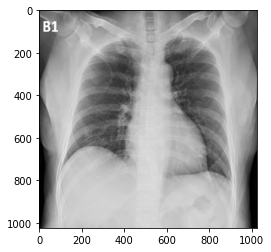

In [3]:
img_covid = plt.imread("/home/hemanth/Documents/DeepLearning/sklearn_image/DataSet/COVID_19/COVID-19 (10).png")
plt.imshow(img_covid)

In [4]:
np.array(img_covid)

array([[[0.3019608 , 0.3019608 , 0.3019608 ],
        [0.3019608 , 0.3019608 , 0.3019608 ],
        [0.29803923, 0.29803923, 0.29803923],
        ...,
        [0.23137255, 0.23137255, 0.23137255],
        [0.23137255, 0.23137255, 0.23137255],
        [0.23137255, 0.23137255, 0.23137255]],

       [[0.3019608 , 0.3019608 , 0.3019608 ],
        [0.3019608 , 0.3019608 , 0.3019608 ],
        [0.3019608 , 0.3019608 , 0.3019608 ],
        ...,
        [0.23529412, 0.23529412, 0.23529412],
        [0.23529412, 0.23529412, 0.23529412],
        [0.23529412, 0.23529412, 0.23529412]],

       [[0.30980393, 0.30980393, 0.30980393],
        [0.30980393, 0.30980393, 0.30980393],
        [0.30980393, 0.30980393, 0.30980393],
        ...,
        [0.24705882, 0.24705882, 0.24705882],
        [0.24313726, 0.24313726, 0.24313726],
        [0.24313726, 0.24313726, 0.24313726]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [5]:
img_covid.shape

(1024, 1024, 3)

In [6]:
img_covid.ndim

3

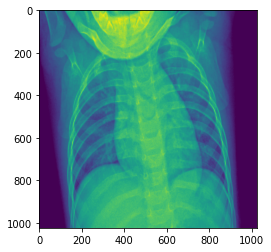

In [7]:
img_normal = plt.imread("/home/hemanth/Documents/DeepLearning/sklearn_image/DataSet/NORMAL/NORMAL (10).png")
plt.imshow(img_normal)

In [8]:
np.array(img_normal)

array([[0.23529412, 0.24705882, 0.23921569, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.23921569, 0.23137255, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.23137255, 0.23137255, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [9]:
img_normal.shape

(1024, 1024)

In [10]:
img_normal.ndim

2

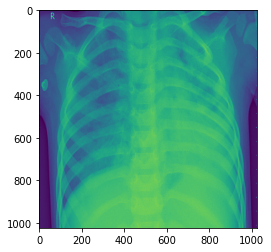

In [11]:
img_viral = plt.imread("/home/hemanth/Documents/DeepLearning/sklearn_image/DataSet/VP/Viral Pneumonia (10).png")
plt.imshow(img_viral)

In [12]:
img_viral.shape

(1024, 1024)

In [13]:
img_viral.ndim

2

In [14]:
np.array(img_viral)

array([[0.00392157, 0.00392157, 0.        , ..., 0.3137255 , 0.32156864,
        0.34509805],
       [0.        , 0.        , 0.        , ..., 0.34117648, 0.34509805,
        0.33333334],
       [0.        , 0.        , 0.00784314, ..., 0.36862746, 0.36078432,
        0.32941177],
       ...,
       [0.07450981, 0.07450981, 0.07450981, ..., 0.04313726, 0.04313726,
        0.04313726],
       [0.07450981, 0.07450981, 0.07450981, ..., 0.04313726, 0.04313726,
        0.04313726],
       [0.07450981, 0.07450981, 0.07450981, ..., 0.04313726, 0.04313726,
        0.04313726]], dtype=float32)

### TensorFlow

In [15]:
import tensorflow as tf
### Multiple Load images

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import pathlib
import os
import tensorflow_datasets as tfds
import PIL
import PIL.Image


In [18]:
directory='/home/hemanth/Documents/DeepLearning/sklearn_image/DataSet/'

In [19]:
data_dir=pathlib.Path(directory)
data_dir


PosixPath('/home/hemanth/Documents/DeepLearning/sklearn_image/DataSet')

In [20]:
image_count=len(list(data_dir.glob('*/*.png')))
image_count

2594

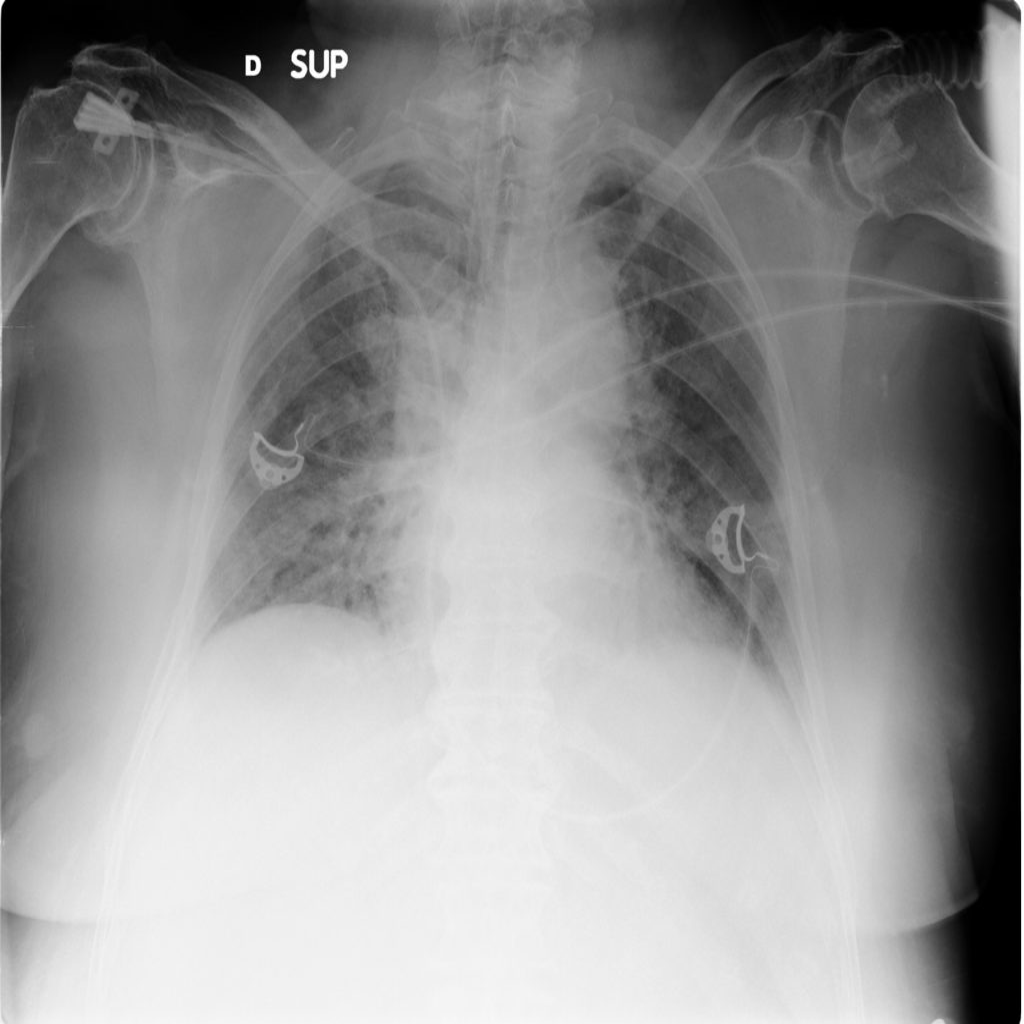

In [21]:
COVID_19=list(data_dir.glob('COVID_19/*'))
PIL.Image.open(str(COVID_19[0]))

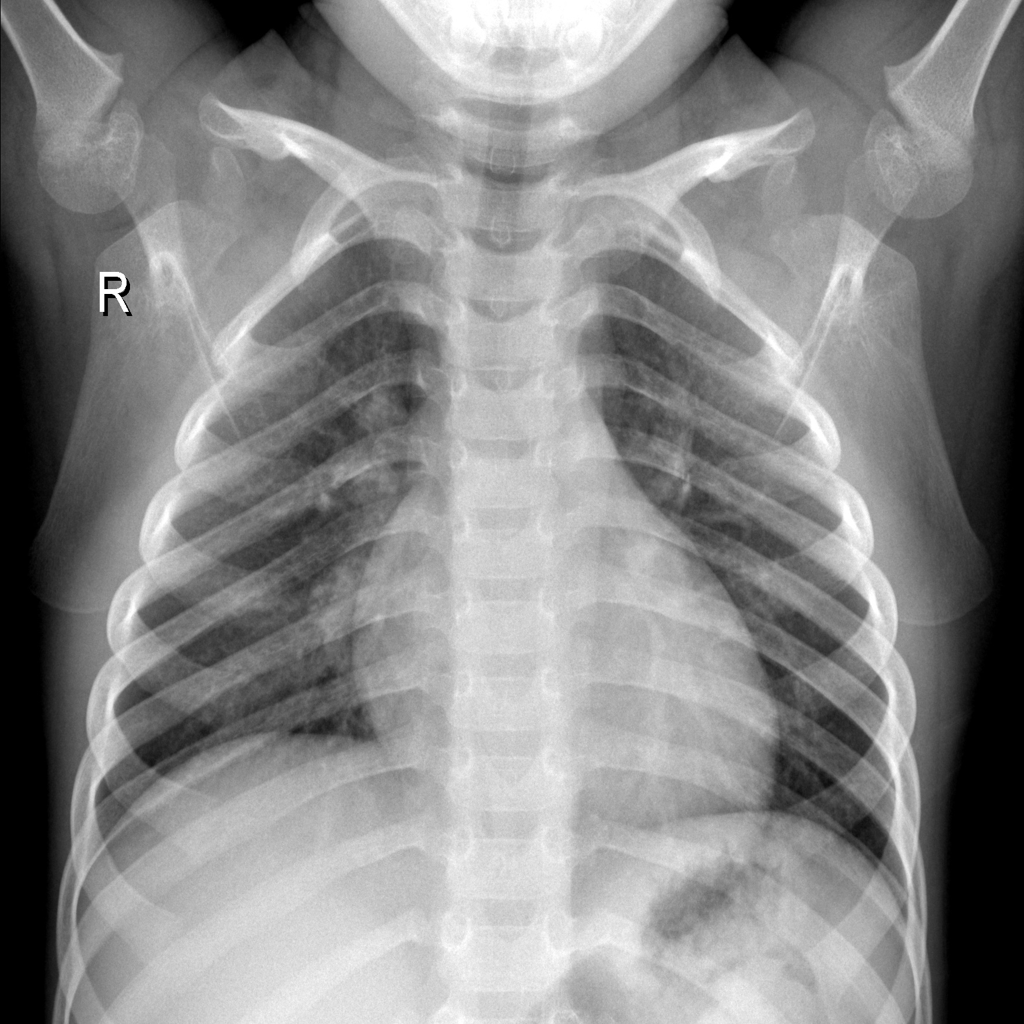

In [22]:
NORMAL=list(data_dir.glob('NORMAL/*'))
PIL.Image.open(str(NORMAL[0]))

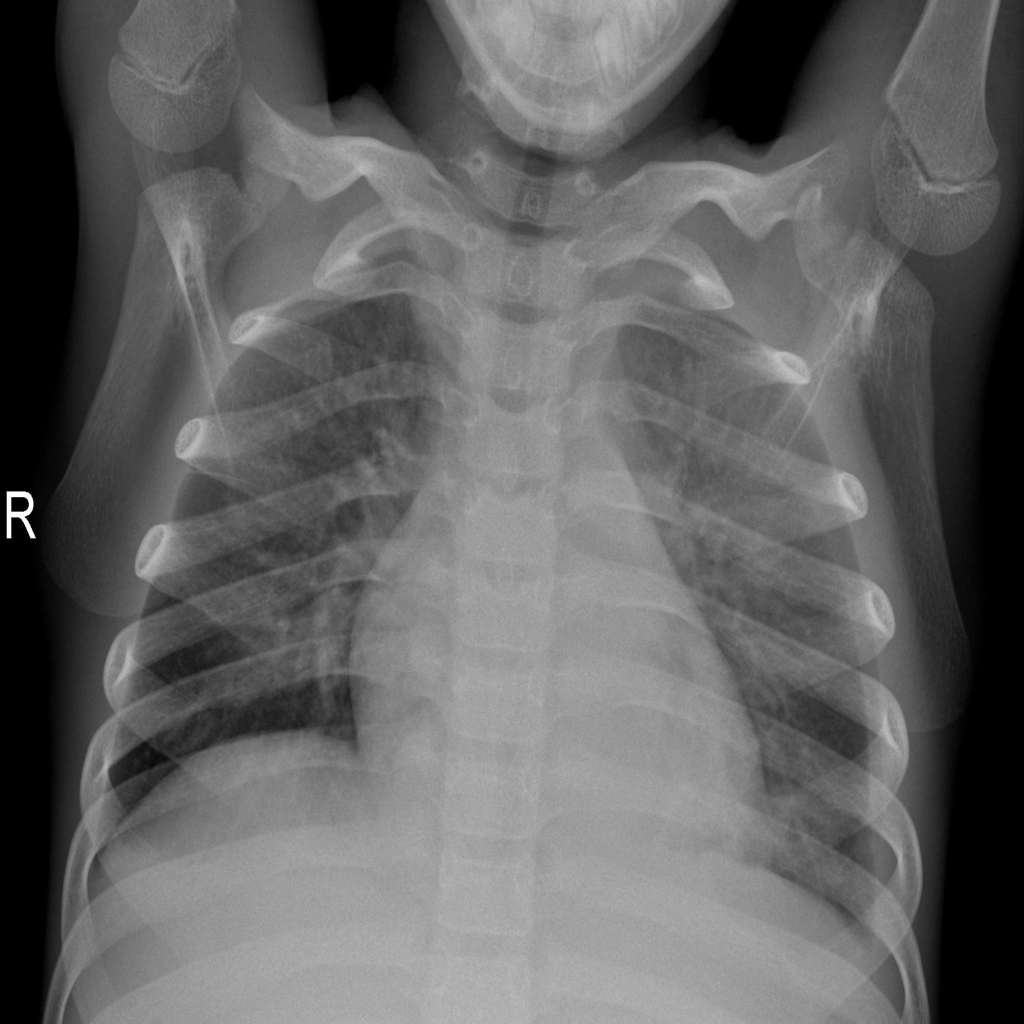

In [23]:
VP=list(data_dir.glob('VP/*'))
PIL.Image.open(str(VP[0]))


In [24]:
batch_size = 32
img_height = 180
img_width = 180


In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2594 files belonging to 3 classes.
Using 2076 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2594 files belonging to 3 classes.
Using 518 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)


['COVID_19', 'NORMAL', 'VP']


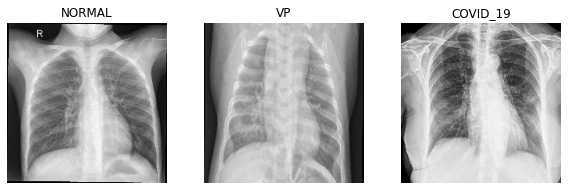

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [40]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


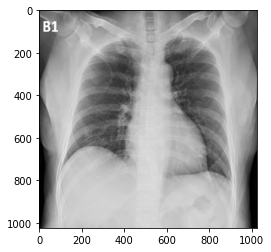

In [29]:
img_covid = image.load_img("/home/hemanth/Documents/DeepLearning/sklearn_image/DataSet/COVID_19/COVID-19 (10).png")
plt.imshow(img_covid)

In [30]:
im_coivd=np.array(img_covid)
im_coivd


array([[[77, 77, 77],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [59, 59, 59]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [62, 62, 62]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)

In [31]:
print(im_coivd.shape)
print(im_coivd.ndim)
print(im_coivd.size)

(1024, 1024, 3)
3
3145728


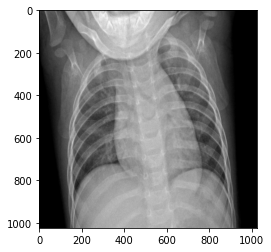

In [32]:
img_normal =image.load_img("/home/hemanth/Documents/DeepLearning/sklearn_image/DataSet/NORMAL/NORMAL (10).png")
plt.imshow(img_normal)

In [33]:
im_normal=np.array(img_normal)
im_normal


array([[[60, 60, 60],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[60, 60, 60],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[60, 60, 60],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [34]:
print(im_normal.shape)
print(im_normal.ndim)

(1024, 1024, 3)
3


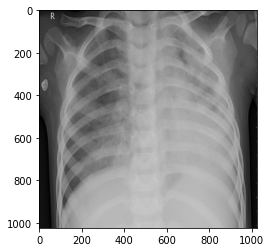

In [35]:
img_viral = image.load_img("/home/hemanth/Documents/DeepLearning/sklearn_image/DataSet/VP/Viral Pneumonia (10).png")
plt.imshow(img_viral)

In [36]:
im_viral=np.array(img_normal)
im_viral

array([[[60, 60, 60],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[60, 60, 60],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[60, 60, 60],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [37]:
print(im_viral.shape)
print(im_viral.ndim)

(1024, 1024, 3)
3
